<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification Part 2 Classification Metrics

_Authors: Matt Brems, Dave Yerrington, Noelle Brown, Jeff Hale, Ng Shu Min_

---

### Learning Objectives
- Calculate various classification model evaluation metrics.
- Describe the inverse relationship between sensitivity and specificity.
- Understand what the ROC shows and interpret ROC AUC.
---



## Importing libraries
---

We'll need the following libraries for this notebook:


In [3]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import train_test_split.
from sklearn.model_selection import train_test_split

# Import Logistic Regression model.
#from sklearn.linear_model import LogisticRegression

# Import metrics.
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, plot_roc_curve, roc_auc_score, recall_score, precision_score, f1_score

## Load in Our Model

We will load in the model that we saved previously into the pickle file:


In [4]:
import pickle
filename = 'admissions_log_reg.pkl'

#unpacking pickle file
with open(filename, 'rb') as f:
    lr = pickle.load(f)

In [11]:
# Load the X_test and y_test that we saved
X_test = pd.read_csv('admissions_X_test.csv', index_col=0)

# Similarly load in y_test. What is the difference when the index_col is not specified?
y_test = pd.read_csv('admissions_y_test.csv', index_col=0)

In [12]:
# X_test
y_test.head()

,admit
1989,0
3500,0
123,0
1368,0
3301,0


In [13]:
# Score the model on the test set
# What does the result represent?
lr.score(X_test,y_test)

0.8979848866498741

## Classification Metrics

The `score` method returns the accuracy, but there are other important classification metrics that we need.

First we should store the predictions that we obtained and have a look at them more closely.

In [14]:
# Store the predictions in a variable y_hat
y_hat = lr.predict(X_test)
y_hat

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,

In [16]:
# Get the probability that admit=1
pred_probs = lr.predict_proba(X_test)[:,1]

In [17]:
pred_probs

array([1.01177431e-01, 1.75187639e-01, 4.87447244e-03, 6.75510111e-01,
       3.87788502e-01, 3.20736002e-01, 3.81995353e-02, 9.45843102e-01,
       9.86474594e-01, 2.47571836e-02, 1.96146667e-03, 7.63891159e-01,
       8.84142266e-02, 1.37918267e-02, 3.14440670e-02, 2.12222821e-01,
       1.06131283e-01, 2.04618354e-02, 2.96603104e-01, 4.41169253e-03,
       3.92030574e-01, 1.38937710e-01, 2.22373881e-03, 3.32312056e-01,
       1.78333712e-02, 4.79476275e-02, 8.82382319e-04, 8.68606222e-01,
       9.91155403e-01, 9.95032311e-01, 9.96972725e-01, 5.23069201e-04,
       9.61385070e-03, 1.67214052e-02, 9.75473677e-01, 5.53970696e-01,
       3.98510837e-02, 6.30202931e-02, 2.60833871e-03, 2.08443440e-02,
       9.22649426e-01, 9.79363958e-01, 1.32340565e-02, 1.05478754e-02,
       1.54153193e-03, 5.12448408e-01, 3.57574574e-03, 1.25889099e-01,
       8.25675759e-02, 9.87587293e-01, 3.16485962e-02, 4.35943894e-02,
       5.88426209e-01, 3.75413330e-02, 5.07322281e-01, 3.32296359e-03,
      

In [18]:
predicted_results = pd.DataFrame({'gpa':X_test['gpa'], 
                                  'actual':y_test['admit'], 
                                  'predicted':y_hat,
                                  'pred_probs':pred_probs})

In [19]:
predicted_results.head()

,gpa,actual,predicted,pred_probs
1989,3.122351,0,0,0.101177
3500,3.249757,0,0,0.175188
123,2.493331,0,0,0.004874
1368,3.707782,0,1,0.675510
3301,3.469022,0,0,0.387789


In [20]:
# Show the rows where the actual is not equal to predicted
predicted_results[predicted_results['actual']!=predicted_results['predicted']]

,gpa,actual,predicted,pred_probs
1368,3.707782,0,1,0.675510
2008,3.410071,1,0,0.320736
75,3.939648,0,1,0.868606
1541,2.695446,1,0,0.013234
3218,3.570644,0,1,0.512448
...,...,...,...,...
114,3.799891,0,1,0.767139
656,3.461629,1,0,0.379079
1174,3.575119,0,1,0.518018
1397,3.302763,1,0,0.216675


In [21]:
# What about where the actual is  equal to predicted
predicted_results[predicted_results['actual']==predicted_results['predicted']]

,gpa,actual,predicted,pred_probs
1989,3.122351,0,0,0.101177
3500,3.249757,0,0,0.175188
123,2.493331,0,0,0.004874
3301,3.469022,0,0,0.387789
2333,2.913302,0,0,0.038200
...,...,...,...,...
3418,2.052876,0,0,0.000545
1841,4.302116,1,1,0.975755
1123,2.464683,0,0,0.004229
3451,2.858781,0,0,0.029378


In [22]:
# Let's see how many actual = predicted
num_correct = predicted_results[predicted_results['actual']==predicted_results['predicted']].shape[0]
num_correct

713

In [23]:
# Let's see how many actual != predicted
num_wrong = predicted_results[predicted_results['actual']!=predicted_results['predicted']].shape[0]
num_wrong

81

In [24]:
# Calculate the accuracy
accuracy = num_correct / (num_correct + num_wrong)
accuracy

0.8979848866498741

## Confusion Matrix

Instead of manually calculating the true positive and true negatives, we can get the confusion matrix from `sklearn`.


In [26]:
cm = confusion_matrix(y_test, y_hat)

In [27]:
cm

array([[517,  40],
       [ 41, 196]], dtype=int64)

## Confusion DataFrame
---

The confusion matrix we just created isn't very explanatory, so let's drop it into a pandas `DataFrame`.

In [28]:
cm_df = pd.DataFrame(cm, columns=['pred 0', 'pred 1'], index=['actual 0', 'actual 1'])
cm_df

,pred 0,pred 1
actual 0,517,40
actual 1,41,196


In [29]:
# Calculate Accuracy
# (TP + TN) / (Total)
(517+196)/(517+40+41+196)

0.8979848866498741

In [30]:
# can also find using sklearn.metrics function
accuracy_score(y_test, y_hat)

0.8979848866498741

## How many Type I errors are there?
---

<details>
    <summary>Need a hint?</summary>
    Type I = False positive
</details>

In [32]:
FP = 40
TP = 196

## How many Type II errors are there?
---
<details>
    <summary>Need a hint?</summary>
    Type II = False negatives
</details>

In [31]:
FN = 41
TN = 517

## Calculate recall (a.k.a. sensitivity)
---

<details>
    <summary>Need a hint?</summary>
    Recall = Sensitivity, and there are no p's in sensitivity: TP/P
</details>

In [33]:
# Manual calculation
TP / (TP + FN)

0.8270042194092827

In [39]:
# Check using sklearn.metric's recall_score
recall = recall_score(y_test, y_hat)

## Calculate the specificity
---

<details>
    <summary>Need a hint?</summary>
    There is a p in specificity, therefore there are no p's in the calculation: TN/all N
</details>

In [35]:
# Manual calculation
TN / (TN + FP)

0.9281867145421903

## Calculate the precision
---

<details>
    <summary>Need a hint?</summary>
    Precision is number true positives in positive predictions: TN / (TP + FP)
</details>

In [36]:
TP / (TP + FP)

0.8305084745762712

In [38]:
# Using sklearn.metric precision_score
precision = precision_score(y_test, y_hat)

### F1 score

The F1 score is the harmonic mean of precision and recall.

If you care about precision and recall roughly the same amount, F1 score is a great metric to use.

Note that even though all the metrics you’ve seen can be followed by the word score F1 always is. 🤷‍♀️

$$
2*\frac{(\text{Precision}*\text{Recall})} {(\text{Precision} + \text{Recall})}
$$

**What is the F1 Score?**

In [40]:
# by hand
2 * (precision*recall) / (precision + recall)

0.8287526427061311

In [41]:
# from sklearn
f1_score(y_test, y_hat)

0.8287526427061311

## Other Confusion Matrix Tips and Tricks

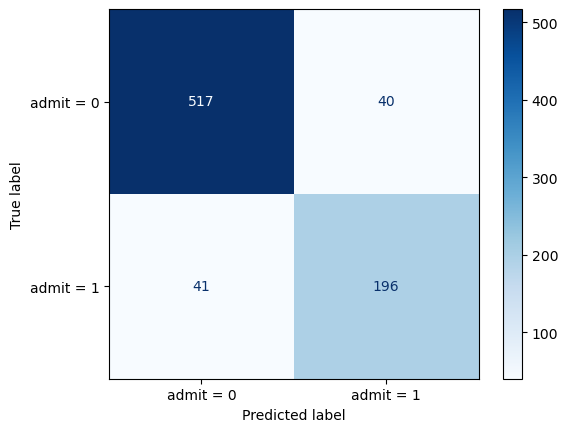

In [42]:
# plot it!
# https://github.com/justmarkham/scikit-learn-tips/blob/master/notebooks/20_plot_confusion_matrix.ipynb
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr, X_test, y_test, cmap='Blues', 
                      values_format='d', display_labels=['admit = 0', 'admit = 1']);

In [43]:
## Ravel it!
# Save TN/FP/FN/TP values.

tn, fp, fn, tp = confusion_matrix(y_test, y_hat).ravel()

# Note that .ravel() will arrange items in a one-dimensional array.
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html

In [45]:
tp

196

## Relationship between Sensitivity and Specificity

Let's create a plot to compare the predicted probabilities and the actual results. 

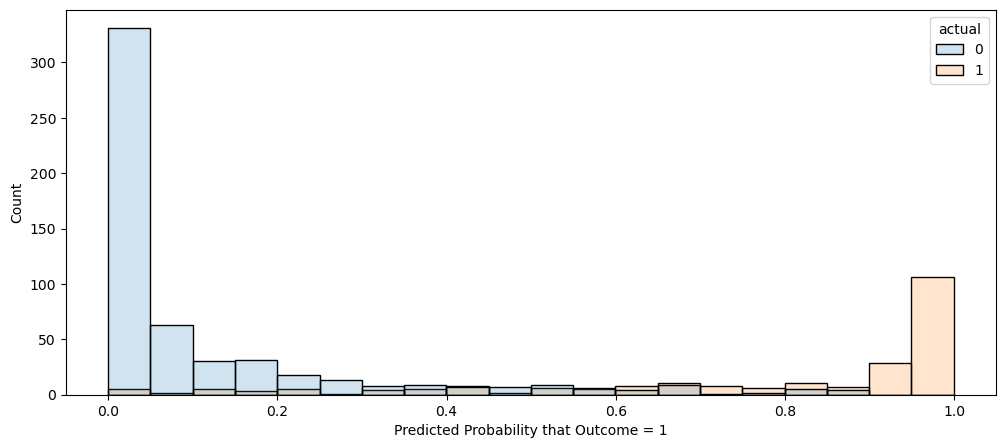

In [46]:
plt.figure(figsize = (12, 5))

sns.histplot(predicted_results, x='pred_probs', hue='actual', bins=20, alpha=0.2)
plt.xlabel('Predicted Probability that Outcome = 1')
plt.show()

Where there are overlaps, there would be misclassifications of some of the observations.

Consider if the cutoff for the predicted probability is 0.5, so an observation with predicted probability 0.5 and above would be predicted as 1, and below 0.5 would be predicted as 0.

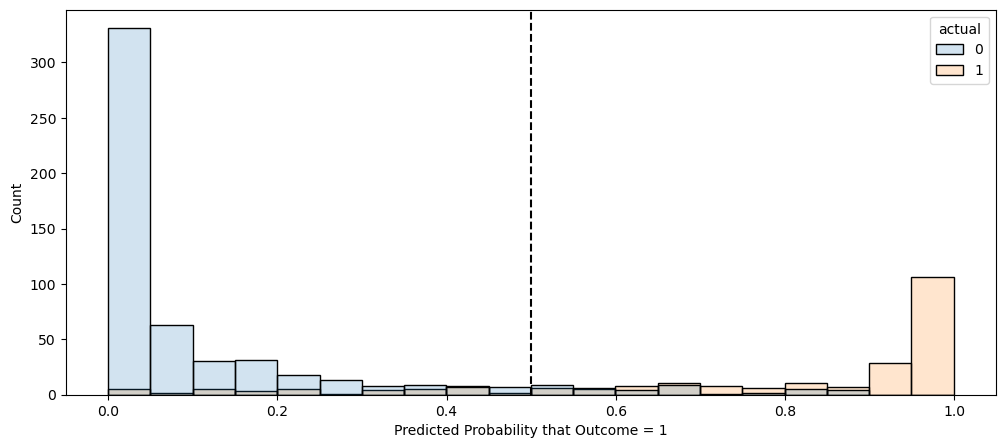

In [47]:
plt.figure(figsize = (12, 5))

# plot distributions of predicted probabilities by actual values
sns.histplot(predicted_results, x='pred_probs', hue='actual', bins=20, alpha=0.2)

# Add cutoff line
plt.axvline(0.5, color = 'black', linestyle = '--')

plt.xlabel('Predicted Probability that Outcome = 1')
plt.show()

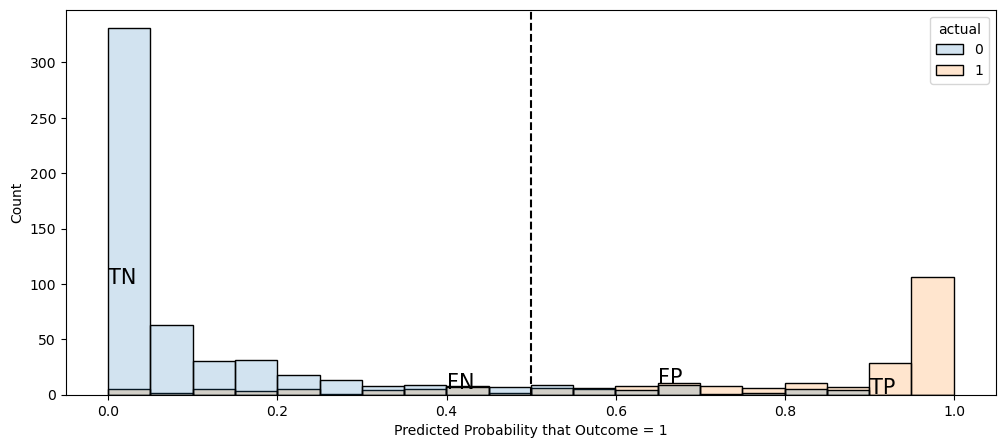

In [48]:
plt.figure(figsize = (12, 5))

# plot distributions of predicted probabilities by actual values
sns.histplot(predicted_results, x='pred_probs', hue='actual', bins=20, alpha=0.2)

# Add cutoff line
plt.axvline(0.5, color = 'black', linestyle = '--')

# Add annotations for TN, FN, TP, FP.
plt.annotate(xy = (0.0, 100), text = 'TN', size = 15)
plt.annotate(xy = (0.4, 5), text = 'FN', size = 15)
plt.annotate(xy = (0.90, 1), text = 'TP', size = 15)
plt.annotate(xy = (0.65, 10), text = 'FP', size = 15)

plt.xlabel('Predicted Probability that Outcome = 1')
plt.show()

Text(0.5, 0, 'Predicted Probability that Outcome = 1')

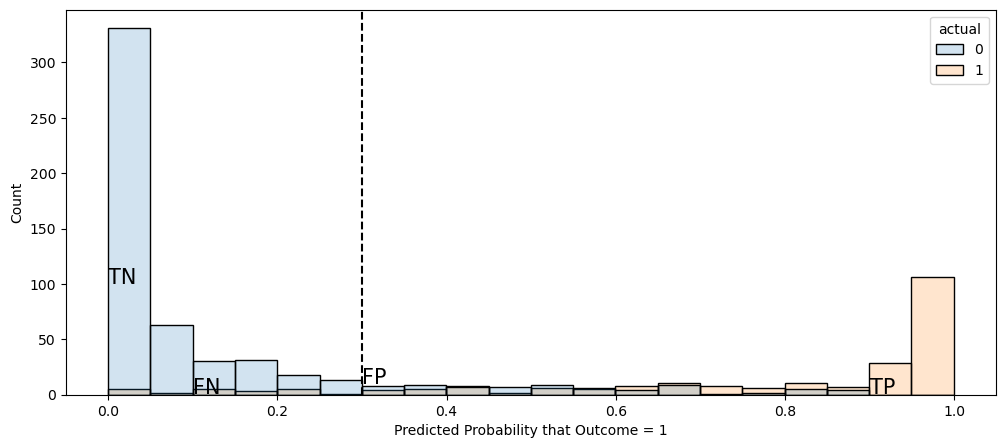

In [49]:
plt.figure(figsize = (12, 5))

# plot distributions of predicted probabilities by actual values
sns.histplot(predicted_results, x='pred_probs', hue='actual', bins=20, alpha=0.2)

# Add cutoff line
plt.axvline(0.3, color = 'black', linestyle = '--')

# Add annotations for TN, FN, TP, FP.
plt.annotate(xy = (0.0, 100), text = 'TN', size = 15)
plt.annotate(xy = (0.1, 1), text = 'FN', size = 15)
plt.annotate(xy = (0.90, 1), text = 'TP', size = 15)
plt.annotate(xy = (0.3, 10), text = 'FP', size = 15)


plt.xlabel('Predicted Probability that Outcome = 1')


<details><summary>When I moved my classification threshold to the left, what happened to sensitivity and specificity?</summary>
- Our number of true negatives decreased and our number of total negatives remains the same.
    - $\text{Specificity} = \frac{TN}{N} \Rightarrow \text{Specificity decreases.}$
- Our number of true positives increased and our number of total positives remains the same.
    - $\text{Sensitivity} = \frac{TP}{P} \Rightarrow \text{Sensitivity increases.}$

</details>

Our goal should be to build a model such that there is **no overlap** between the blue histogram and the orange histogram!
- If there is overlap, we need to recognize the tradeoff between sensitivity and specificity. (As one increases, the other decreases.)
- One measure of how much overlap exists between our distributions is the **area under the ROC curve**.

## Receiver Operating Characteristic (ROC) Curve

Plot the True Positive Rate vs. False Positive Rate for the range of possible decision thresholds and you get the ROC curve!

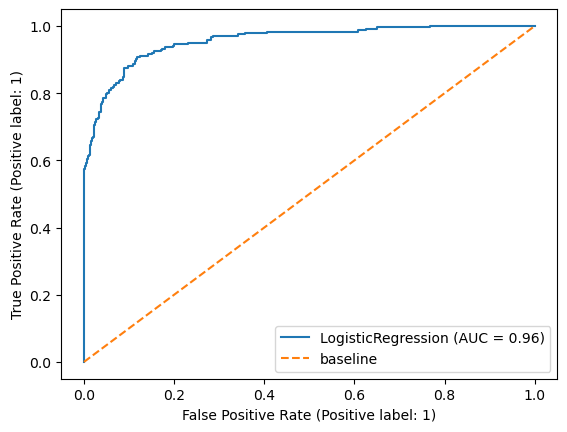

In [50]:
plot_roc_curve(lr, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend()
plt.show()

### ROC AUC

The more area under this blue curve is, the better separated our distributions are.
- Check out this gif ([source](https://twitter.com/DrHughHarvey/status/1104435699095404544)):

![](https://media.giphy.com/media/H1SZ5oRLIuZ1t1c4Di/giphy.gif)

We use the **area under the ROC curve** (abbreviated **ROC AUC** or **AUC ROC**) to quantify the gap between our distributions.

In [51]:
roc_auc_score(y_test, y_hat)

0.8775954669757365

### Interpreting ROC AUC
- If you have an ROC AUC of 0.5, your positive and negative populations perfectly overlap and your model is as bad as it can get.
- If you have an ROC AUC of 1, your positive and negative populations are perfectly separated and your model is as good as it can get.
- The closer your ROC AUC is to 1, the better. (1 is the maximum score.)
- If you have an ROC AUC of below 0.5, your positive and negative distributions have flipped sides. By flipping your predicted values (i.e. flipping predicted 1s and 0s), your ROC AUC will now be above 0.5.
    - Example: You have an ROC AUC of 0.2. If you change your predicted 1s to 0s and your predicted 0s to 1s, your ROC AUC will now be 0.8!

We generate one ROC curve per model. The ROC curve is generated by varying our threshold from 0 to 1. This doesn't actually change the threshold or our original predictions, but it helps us to visualize our tradeoff between _sensitivity_ and _specificity_ and understand how well-separated our populations are.

### Changing your prediction threshold

If you want, you could change your prediction threshold to a custom value.

In [52]:
def get_predictions(probabilities, threshold):
    return [0 if prob < threshold else 1 for prob in probabilities]

In [53]:
print(get_predictions(lr.predict_proba(X_test)[:,1], 0.3)[:10])

[0, 0, 0, 1, 1, 1, 0, 1, 1, 0]


In [54]:
threshold_list = [0.25, 0.4, 0.5, 0.6, 0.75]

for threshold in threshold_list:
    preds = get_predictions(lr.predict_proba(X_test)[:,1], threshold)
    acc = accuracy_score(y_test, preds)
    print(f'Threshold: {threshold}, Accuracy: {acc}')

Threshold: 0.25, Accuracy: 0.8690176322418136
Threshold: 0.4, Accuracy: 0.8942065491183879
Threshold: 0.5, Accuracy: 0.8979848866498741
Threshold: 0.6, Accuracy: 0.9042821158690176
Threshold: 0.75, Accuracy: 0.8866498740554156


## Summary

Classification metrics are used to evaluate a classification model. 

We can generate a confusion matrix to view the True Positives, True Negatives, False Positives and False Negatives.

Then we use these values to calculate 
- accuracy (1 - misclassification)
- recall (aka sensitivity or true positive rate)
- specificity (1 - false positive rate)
- precision (positive predictive value)

For a binary classifier, the naive classifer would be based on classifying at random (0.5 chance of getting 1 or 0), so our model should have an accuracy that is better than 50%!